In [1]:
import sys
sys.path.append('../src')

In [2]:
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [27]:
import gta.recording.unified

In [36]:
# recording = gta.recording.unified.UnifiedRecorder(
#     includeKeyboard=False,
#     gamepadPeriod=.001, visionPeriod=.001
# )
# recording.start()
# time.sleep(10)

In [37]:
# recording.stop()

In [38]:
# X, Y, T = recording.XYT()

In [121]:
gpRecording = gta.recording.gamepad.GamepadRecorder(period=.001)
gpRecording.start()
time.sleep(10)

In [122]:
gpRecording.stop()

In [123]:
results = gpRecording.results

In [124]:
T = gpRecording.times
Y = np.zeros((T.size, int(results[:, 0].max()+1))).astype(float)
state = np.zeros((int(results[:, 0].max()+1,)))
for i, (eid, value) in enumerate(results):
    state[int(eid)] = value
    Y[i, :] = state

In [125]:
len(T)

631

In [126]:
import gta.gameInputs
reload(gta.gameInputs)

<module 'gta.gameInputs' from '../src\\gta\\gameInputs\\__init__.py'>

In [127]:
controlInputs = gta.gameInputs.ControlInputs()

In [128]:
# controlInputs.applyControlState([0, 0, 0, 0, 0, 1])

In [129]:
# controlInputs.applyControlState([0, 0, 0, 0, 0, 0])

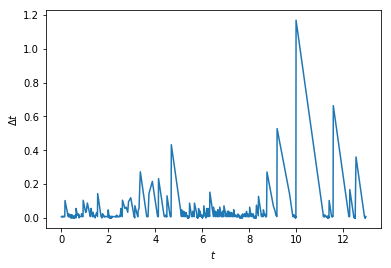

In [136]:
fig, ax = plt.subplots()
ax.plot(T[:-1] - T.min(), np.diff(T))
ax.set_xlabel('$t$')
ax.set_ylabel('$\Delta t$');

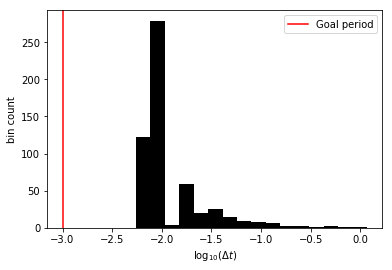

In [135]:
dt = np.diff(T)
fig, ax = plt.subplots()
ax.hist(np.log10(dt[dt != 0]), bins=16, color='black')
ax.set_xlabel('$\log_{10}(\Delta t)$')
ax.set_ylabel('bin count');
ax.axvline(np.log10(gpRecording.workerArgs[-1]), label='Goal period', color='red')
ax.legend();

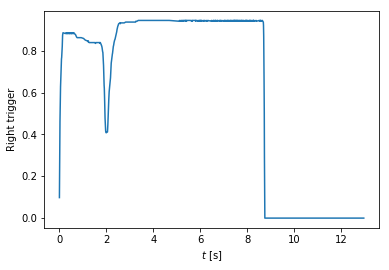

In [134]:
rt = Y[:, 5]
fig, ax = plt.subplots()
ax.plot(T-T.min(), rt)
ax.set_ylabel('Right trigger')
ax.set_xlabel('$t$ [s]');

In [133]:
t0 = time.time()
for t, y in zip(T-T.min(), Y):
    now = time.time() - t0
    if now <= t:
        d = t - now
        time.sleep(d)
        controlInputs.applyControlState(y)
    else:
        print('Skipped an input at t=', t)

Skipped an input at t= 0.391895532608
Skipped an input at t= 0.431731700897
Skipped an input at t= 0.455773591995
Skipped an input at t= 0.503807067871
Skipped an input at t= 0.511547803879
Skipped an input at t= 0.519551277161
Skipped an input at t= 0.535566568375
Skipped an input at t= 0.54408621788
Skipped an input at t= 0.552082061768
Skipped an input at t= 0.560090780258
Skipped an input at t= 0.624150753021
Skipped an input at t= 0.751274585724
Skipped an input at t= 1.43221831322
Skipped an input at t= 1.71946716309
Skipped an input at t= 2.03927516937
Skipped an input at t= 2.055788517
Skipped an input at t= 2.06379771233
Skipped an input at t= 2.07230520248
Skipped an input at t= 2.07230520248
Skipped an input at t= 2.07981538773
Skipped an input at t= 2.07981538773
Skipped an input at t= 2.08732151985
Skipped an input at t= 2.08732151985
Skipped an input at t= 2.09583067894
Skipped an input at t= 2.09583067894
Skipped an input at t= 2.09583067894
Skipped an input at t= 2.1038